In [ ]:
!pip install gymnasium
!pip install stable-baselines3
!pip install pyvirtualdisplay
!sudo apt-get install xvfb
!pip install swig
!pip install gymnasium[box2d]

In [2]:
import gymnasium as gym
from stable_baselines3 import SAC,DDPG
import numpy as np
import matplotlib.pyplot as plt

In [3]:
env = gym.make("CarRacing-v2")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
def epsilon_greedy(Q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(len(Q_values))
    else:
        return np.argmax(Q_values)

In [5]:
def ucb1(Q_values, counts, total_counts):
    ucb_values = Q_values + np.sqrt((2 * np.log(total_counts)) / counts)
    return np.argmax(ucb_values)

In [6]:
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
model = DDPG("MlpPolicy", env, action_noise=action_noise, verbose=1)
model.learn(total_timesteps=5000, log_interval=1)
model.save("ddpg_car_racing")

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.32GB > 12.08GB
  warnings.warn(


Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -35.2    |
| time/              |          |
|    episodes        | 1        |
|    fps             | 55       |
|    time_elapsed    | 17       |
|    total_timesteps | 1000     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -64.2    |
| time/              |          |
|    episodes        | 2        |
|    fps             | 38       |
|    time_elapsed    | 51       |
|    total_timesteps | 2000     |
| train/             |          |
|    actor_loss      | -0.0198  |
|    critic_loss     | 0.638    |
|    learning_rate   | 0.001    |
|    n_updates       | 1000     |
---------------------------------
--------------

In [7]:
import gym
from IPython import display
from pyvirtualdisplay import Display
from matplotlib import animation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
del model
timestamp = 1000
model = DDPG.load("ddpg_car_racing")
ddpg_reward = []
d = Display()
d.start()
env = gym.make('CarRacing-v2')
obs = env.reset()
img = []
for i in range(timestamp):
    action, _states = model.predict(obs)
    obs, reward, terminated, truncated = env.step(action)
    ddpg_reward.append(reward)
    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))
    if d:
        env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [9]:
dpi = 10
interval = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))
env.close()

In [28]:
import gymnasium as gym
env = gym.make('CarRacing-v2', render_mode="rgb_array")
model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=5000, log_interval=1)
model.save("sac_car_racing")

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.32GB > 9.12GB
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -33.3    |
| time/              |          |
|    episodes        | 1        |
|    fps             | 21       |
|    time_elapsed    | 45       |
|    total_timesteps | 1000     |
| train/             |          |
|    actor_loss      | -10.2    |
|    critic_loss     | 0.541    |
|    ent_coef        | 0.763    |
|    ent_coef_loss   | -1.36    |
|    learning_rate   | 0.0003   |
|    n_updates       | 899      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -33.7    |
| time/              |          |
|    episodes        | 2        |
|    fps             | 22       |
|    time_elapsed    | 90       |
|    total_timesteps | 2000     |
| train/             |          |
|    actor_loss      | -14.9    |
|    critic_loss     | 0.253    |
|    ent_coef 

In [12]:
import gym

In [ ]:
del model
model = SAC.load("sac_car_racing")
sac_reward = []
d = Display()
d.start()
env = gym.make('CarRacing-v2')
obs = env.reset()
img = []
for i in range(timestamp):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated = env.step(action)
    sac_reward.append(reward)
    display.clear_output(wait=True)
    img.append(env.render('rgb_array'))
    if d:
        env.reset()

In [14]:
dpi = 72
interval = 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))
env.close()

In [ ]:
def plot_training_results(model_logs, model_names, total_steps=100):
    plt.figure(figsize=(12, 6))
    for i, logs in enumerate(model_logs):
        plt.plot(np.arange(0, total_steps, 1), logs["reward"][:total_steps], label=model_names[i])
    plt.title("Comparison: SAC vs DDPG")
    plt.xlabel("Steps")
    plt.ylabel("Reward")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
ddpg_logs = {"reward": []}
sac_logs = {"reward": []}

In [ ]:
ddpg_logs["reward"] = ddpg_reward
sac_logs["reward"] = sac_reward

In [ ]:
plot_training_results([ddpg_logs, sac_logs], ["DDPG", "SAC"])

In [ ]:
import gymnasium as gym

env = gym.make('CarRacing-v2')

learning_rates = [0.0001, 0.001, 0.01]
sac_reward = {0.0001:[],0.001:[],0.01:[]}

In [21]:
for lr in learning_rates:
    model = SAC('MlpPolicy', env, learning_rate=lr, verbose=1)

    model.learn(total_timesteps=5000)

    model.save(f'sac_car_racing_lr_{lr}')
    obs, info = env.reset()
    for i in range(50):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        sac_reward[lr].append(reward)
        if terminated or truncated:
            obs, info = env.reset()

env.close()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.32GB > 10.27GB
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -33.5    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 22       |
|    time_elapsed    | 179      |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -30.3    |
|    critic_loss     | 0.188    |
|    ent_coef        | 0.677    |
|    ent_coef_loss   | -1.97    |
|    learning_rate   | 0.0001   |
|    n_updates       | 3899     |
---------------------------------
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.32GB > 9.91GB
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -34.5    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 22       |
|    time_elapsed    | 177      |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -3.12    |
|    critic_loss     | 0.216    |
|    ent_coef        | 0.0224   |
|    ent_coef_loss   | -17.7    |
|    learning_rate   | 0.001    |
|    n_updates       | 3899     |
---------------------------------
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 55.32GB > 9.95GB
  warnings.warn(


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1e+03     |
|    ep_rew_mean     | -92       |
| time/              |           |
|    episodes        | 4         |
|    fps             | 22        |
|    time_elapsed    | 176       |
|    total_timesteps | 4000      |
| train/             |           |
|    actor_loss      | 8.28e+18  |
|    critic_loss     | inf       |
|    ent_coef        | 8.39e+16  |
|    ent_coef_loss   | -3.73e+03 |
|    learning_rate   | 0.01      |
|    n_updates       | 3899      |
----------------------------------


In [22]:
print(sum(sac_reward[0.0001])/len(sac_reward[0.0001]))
print(sum(sac_reward[0.001])/len(sac_reward[0.001]))
print(sum(sac_reward[0.01])/len(sac_reward[0.01]))

0.10761245674740522
0.08927444794952716
0.03888888888888906


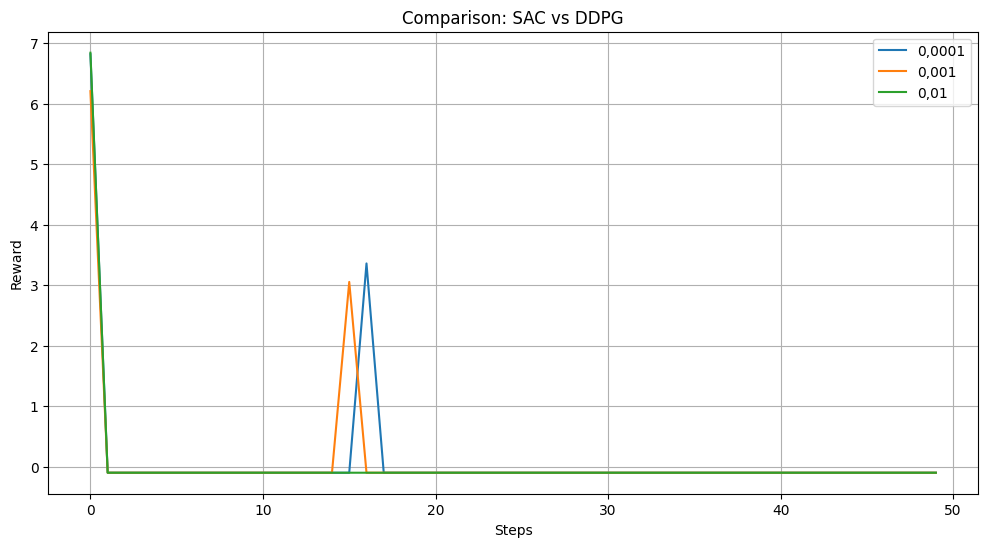

In [23]:
sac_e4,sac_e3,sac_e2 = {}, {}, {}

sac_e4["reward"] = sac_reward[0.0001]
sac_e3["reward"] = sac_reward[0.001]
sac_e2["reward"] = sac_reward[0.01]

plot_training_results([sac_e4, sac_e3, sac_e2], ["0,0001", "0,001", "0,01"], total_steps=50)